## HW4_jz3309_Assignment2

In [54]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline


Populating the interactive namespace from numpy and matplotlib


# IDEA

### People aged between 20 and 30 are more likely than other age groups to choose biking for commuting.

# NULL HYPOTHESIS

### The proportion of people aged 20 to 30 ride Citibikes  is the same or lower than the proportion of those aged 30 to 40  in July, 2016.

# ALERNETIVE HYPOTHESIS

 ### The proportion of people aged 20 to 30 ride Citibikes  is higer than the proportion of those aged 30 to 40  in July, 2016.

### _$H_0$_ : $\frac{N_{\mathrm{20-30}}}{N_{\mathrm{total}}} - \frac{N_{\mathrm{30-40}}}{N_{\mathrm{total}}} <= 0 $
### _$H_1$_ : $\frac{N_{\mathrm{20-30}}}{N_{\mathrm{total}}} - \frac{N_{\mathrm{30-40}}}{N_{\mathrm{total}}} > 0$
## significance level   $\alpha=0.05$

In [55]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [56]:
datastring = '201607'
getCitiBikeCSV(datastring)

file in place, you can continue


In [68]:
df = pd.read_csv(os.getenv('PUIDATA') + "/" + datastring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


In [69]:
!ls $PUIDATA

201307-citibike-tripdata.zip  201507-citibike-tripdata.zip
201501-citibike-tripdata.csv  201607-citibike-tripdata.csv
201501-citibike-tripdata.zip  201607-citibike-tripdata.zip
201506-citibike-tripdata.csv  satresults.csv
201506-citibike-tripdata.zip  times.csv
201507-citibike-tripdata.csv  water.csv


In [70]:
df['age'] = 2016-df['birth year']

df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)

In [71]:
df.columns

Index(['tripduration', 'age'], dtype='object')

In [72]:
df.drop(['tripduration'], axis=1, inplace=True)

In [73]:
df['age'].dropna(inplace=True)
df['age'].astype('int')
dfage = pd.DataFrame(df['age'],columns = ['age'])
dfage.head()

,age
1,32.0
2,30.0
5,25.0
6,27.0
7,27.0


Text(0.5,1,'Number of bikers by age groups in July 2016')

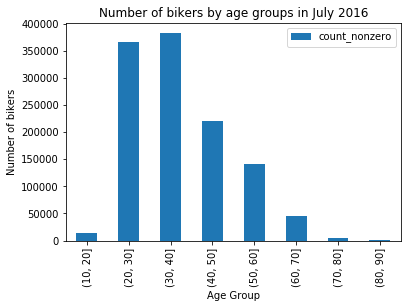

In [94]:
bins = np.arange(10,100,10)
ax = dfage.age.groupby(pd.cut(dfage.age,bins)).agg([count_nonzero]).plot(kind = 'bar',legend = True)
ax.set_ylabel ("Number of bikers")
ax.set_xlabel ("Age Group")
ax.set_title("Number of bikers by age groups in July 2016")

Figure1: The histogram shows distribution of the number of bikers by age groups. People aged 30 to 40 is the largest group using Citibike in July, 2016. Those aged 20 to 30 is the second largest number of bikers. 

In [85]:
agedata = dfage.age.groupby(pd.cut(dfage.age,bins)).agg([count_nonzero])
agedata.rename(columns = {'count_nonzero':'Number of bikers'}, inplace = True)

In [86]:
agedata.describe()

,Number of bikers
count,8.00000
mean,146991.00000
std,159833.61004
min,271.00000
25%,12034.25000
50%,93445.50000
75%,256946.25000
max,382616.00000


In [88]:
sum = agedata['Number of bikers'].sum()

In [96]:
agedata['Fraction of bikers'] = agedata['Number of bikers']/sum

In [97]:
agedata

,Number of bikers,Fraction of bikers
age,,
"(10, 20]",14398.0,0.012244
"(20, 30]",366321.0,0.311517
"(30, 40]",382616.0,0.325374
"(40, 50]",220488.0,0.187501
"(50, 60]",142340.0,0.121045
"(60, 70]",44551.0,0.037886
"(70, 80]",4943.0,0.004203
"(80, 90]",271.0,0.000230


Text(0.5,1,'Fraction of bikers by age groups in July 2016')

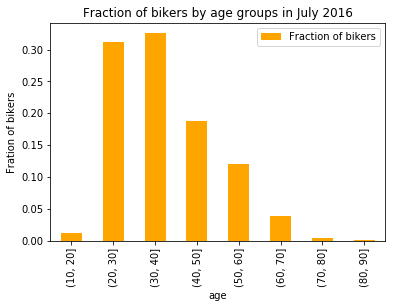

In [98]:
y = agedata['Fraction of bikers']
ax2 = y.plot(kind='bar', color = 'orange', legend = 'Fraction of bikers')
ax2.set_ylabel ("Fration of bikers")
ax2.set_title("Fraction of bikers by age groups in July 2016")

Figure1: The histogram shows fraction of bikers by age groups. People aged 30 to 40 account for more than 30 percent of all the bikers in July, 2016. The frction of those aged 30 to 40 is larger than any other age groups. People aged 20 to 30 is the second largest fraction of rides.